In [180]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp

In [181]:
data=pd.read_csv('data.csv', index_col=0)
X=data.iloc[:,:1]
Y=data.iloc[:,5:6]

In [182]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
res = est.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     7432.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):          1.12e-205
Time:                        22:43:31   Log-Likelihood:                -2449.0
No. Observations:                 286   AIC:                             4902.
Df Residuals:                     284   BIC:                             4909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3770.1268    276.063    -13.657      0.0

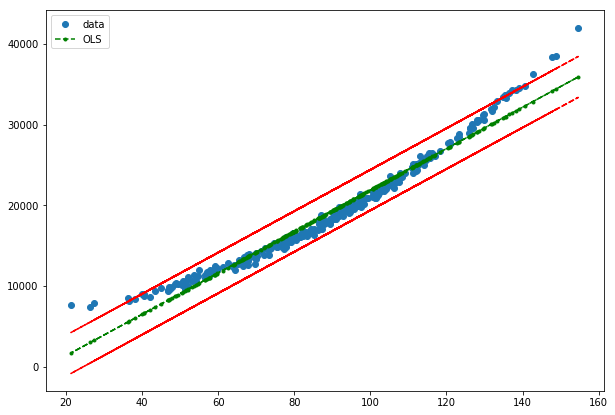

In [189]:
#Regression line

_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(X, Y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(X, res.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(X, confidence_interval_upper, 'r--')
ax.plot(X, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best')


Variance :  1603867.243306179


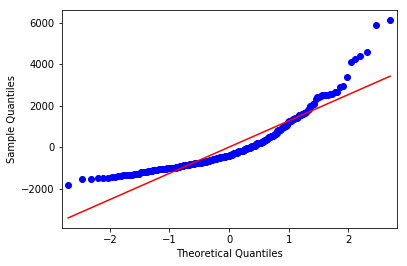

In [184]:
#QQ plot
resi = res.resid 
print ("Variance : ", np.var(resi))
fig = sm.qqplot(resi, line='s')
plt.show()

Text(0.5, 0, 'Residuals')

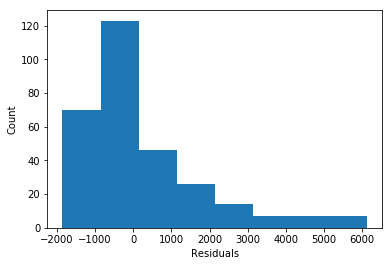

In [185]:
#Histogram
freq,bins,_=plt.hist(res.resid, bins=[-1850.845,-847.862,147.161, 1142.184, 2137.207,  3132.23, 6117.299])
plt.ylabel('Count')
plt.xlabel('Residuals')

In [186]:
#Chi-square

a1, b1 = sp.stats.norm.fit(resi)

scaling_factor = 286*(resi.max()-resi.min())/6
x_middle = 0.5*(bins[1:] + bins[:-1])
expected_values = scaling_factor*sp.stats.norm.pdf(x_middle,a1,b1)
chi,_=sp.stats.chisquare(freq,expected_values,ddof=2)
chi

355.1933331122181

In [190]:
#Chi-square
cdf = stats.norm.cdf(bins, a1, b1)
expected_values = 286 * np.diff(cdf)
chi,_=sp.stats.chisquare(freq,expected_values,ddof=2)
chi

55.995224740408226

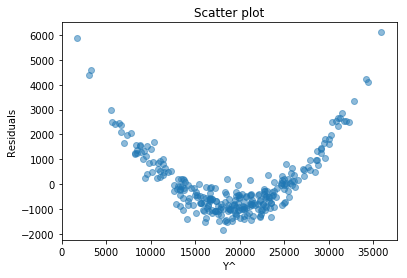

In [188]:
pred = res.predict()
# Plot
plt.scatter(pred, resi,  alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Y^')
plt.ylabel('Residuals')
plt.show()
